## Business Understanding

L'obiettivo richiesto è quello di prevedere la concentrazione nell'aria di PM2.5, ovvero materia atmosferica particolata di piccolissime dimensioni, meno di 2.5 micrometri. 

## Data Understanding

### Data Collection

Andiamo a caricare il file CSV contenente il nostro dataset, e mostriamo le sue prime righe in maniera da visualizzare i tipi di dati da esso contenuti.

In [1]:
# Per caricare e visualizzare il nostro dataset utilizzeremo la libreria Pandas
import pandas as pd

df = pd.read_csv("beijingPM25.csv")
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


Ogni riga del dataset corrisponde a una specifica misurazione metereologica.
Ogni riga del dataset contiene una colonna corrispondente al numero di ogni specifica riga, la data (riportata con le relative colonne per mese, giorno, ora), il Dew Point (ovvero il punto di rugiada, espresso in gradi Celsius), la temperatura (espressa in gradi Celsius), la pressione (espressa in Pascal), la direzione complessiva del vento, la velocità del vento totale e le ore totali di precipitazioni (sia neve che pioggia).

Non sorprende che la colonna relativa alla concentrazione di pm2.5 risulti nulla, in quanto si tratta del valore che vogliamo predire. 

### Data Description

Proseguiamo stampando a schermo ulteriori informazioni sul nostro dataset, come per esempio il numero totale di righe e colonne (con rispettivi data-types). 

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB
None


E' possibile notare che non tutti i campi della colonna pm2.5 risultano nulli. Andremo successivamente ad analizzarli.

### Data Exploration

Continuiamo l'esplorazione del dataset stampando una sua descrizione complessiva, così da visualizzare per ogni colonna le sue statistiche (conteggio, media, deviazione standard, valore minimo/massimo, quartili).

In [3]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


Generiamo ora una heatmap così da visualizzare graficamente il range di correlazione tra le features del dataset.

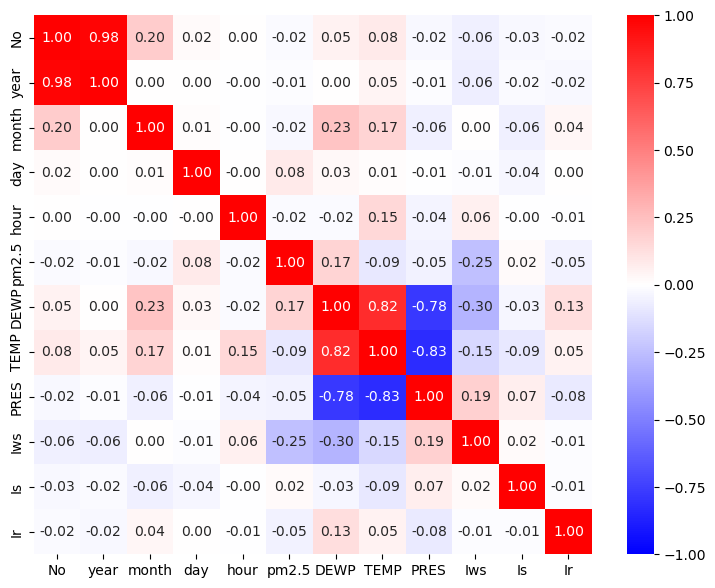

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.select_dtypes(include='number').corr()

fig, ax = plt.subplots(1, figsize=(9, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='bwr', ax=ax)
plt.show()

### Data Quality Verification

Controlliamo ora la presenza di possibili valori duplicati o mancanti.

Il numero di valori mancanti nella colonna pm2.5 corrisponde a quello che avevamo osservato precedentemente.

In [5]:
if df.isnull().sum().sum() > 0:
    print("Numero di valori mancanti per colonna: ", df.isnull().sum())
else:
    print("Non sono presenti valori mancanti")

Numero di valori mancanti per colonna:  No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64


In [6]:
if df.duplicated(subset=['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']).sum() > 0:
    print("Numero di righe duplicate: ", df.duplicated(subset=['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']).sum())
else:
    print("Non sono presenti righe duplicate")

Non sono presenti righe duplicate


Si può notare un'alta correlazione tra temperatura e punto di rugiada, il che non sorprende.
Interessante anche l'anti-correlazione tra pressione / punto di rugiada e pressione / temperatura.

Generiamo boxplot e istogrammi così da controllare la possibile presenza di outliers.

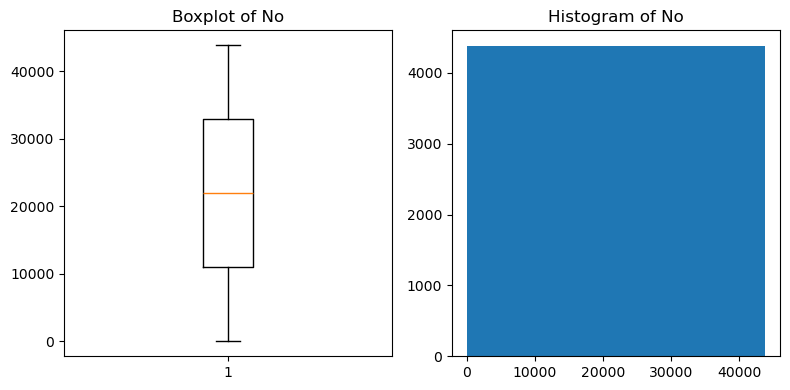

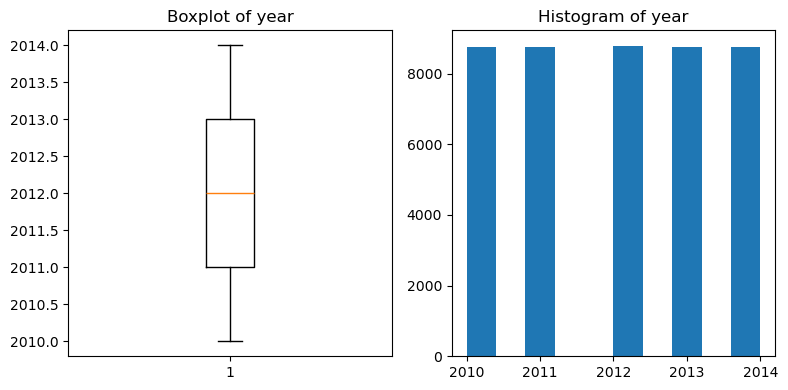

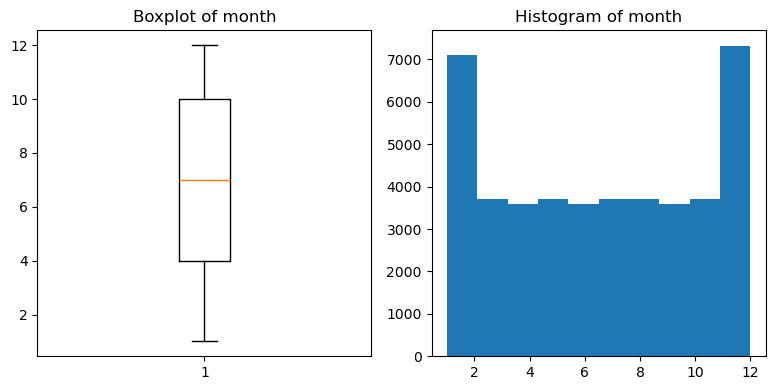

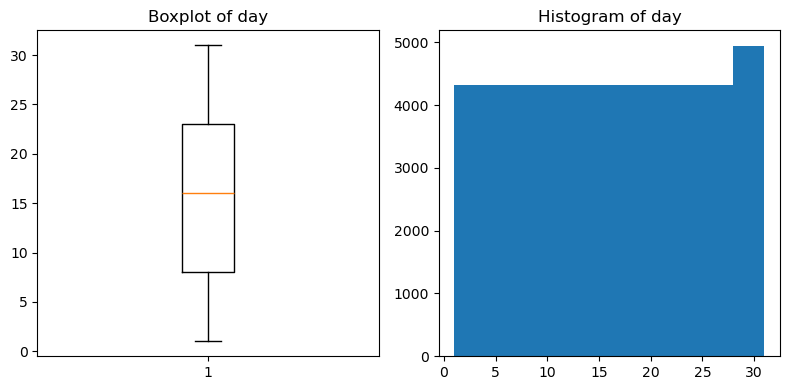

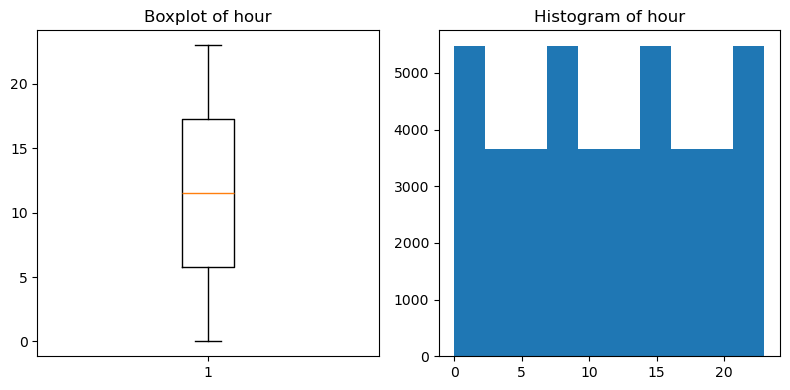

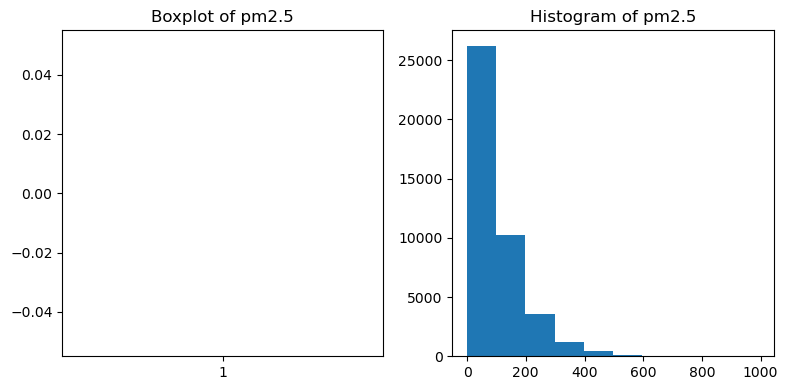

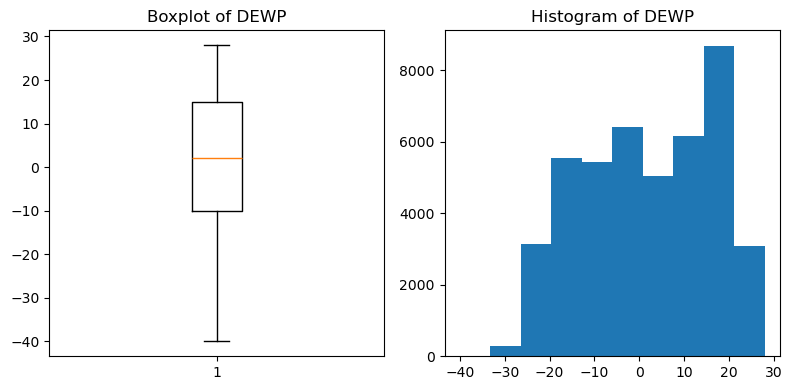

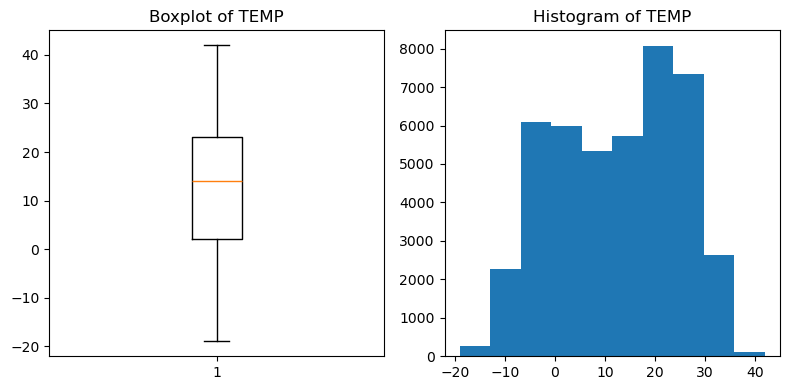

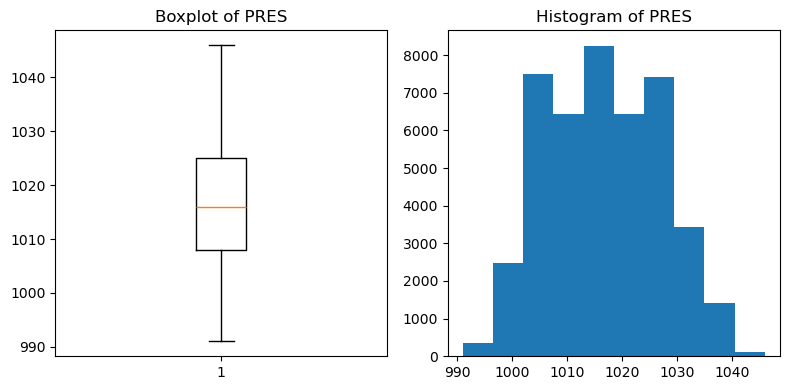

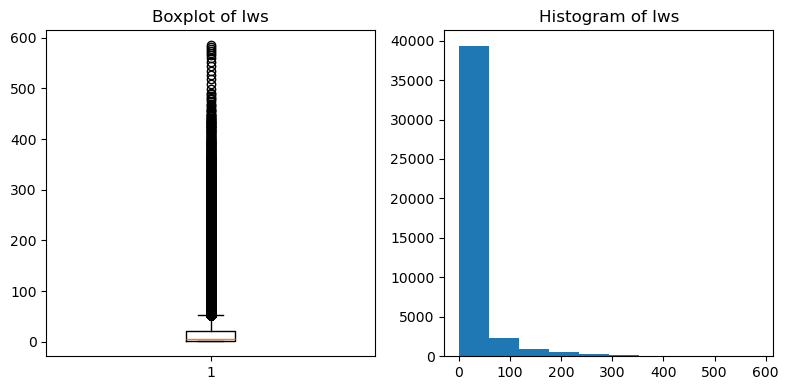

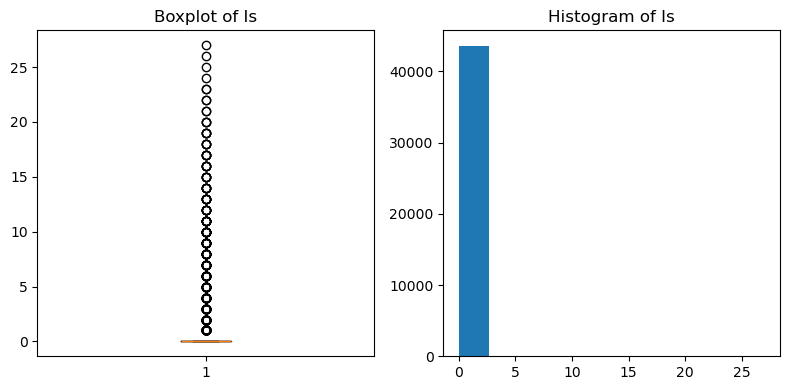

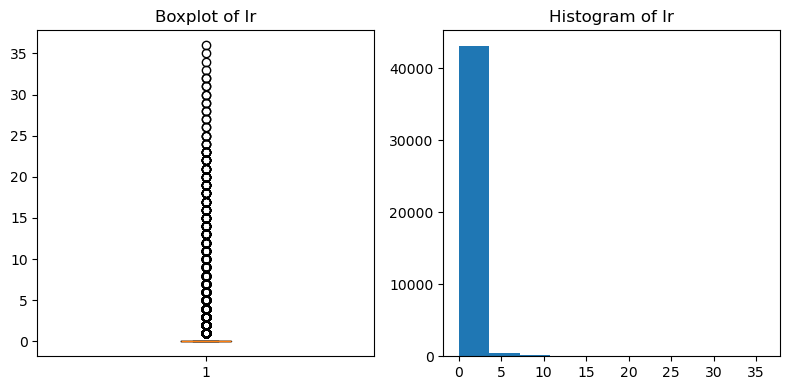

In [7]:
for i, col in enumerate(df.select_dtypes(include='number').columns):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].boxplot(df[col])
    axs[0].set_title(f"Boxplot of {col}")
    axs[1].hist(df[col])
    axs[1].set_title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()

Possiamo ignorare il boxplot/istogramma della colonna Numero.

Interessanti i pattern quasi simmetrici mostrati negli istogrammi delle colonne Hour e PRES.

Per quanto riguarda l'ora, potrebbe essere dovuto al forecasting programmato in determinati periodi della giornata, il quale si ripete appunto dopo un tot di ore prestabilito.
Per quanto riguarda la pressione, è plausibile che sia correlata al periodo dell'anno in cui la registrazione è stata effettuata. 
Infatti anche dall'heatmap precedente era possibile vedere una correlazione (in questo caso anti-correlazione) tra temperatura e pressione.
I boxplot delle colonne relative all'Iws, Ir, Is mostrano invece una distribuzione concentrata maggiormente in un punto.

<Axes: ylabel='Frequency'>

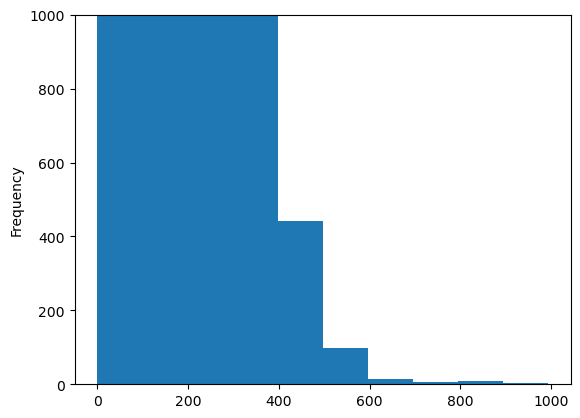

In [8]:
df['pm2.5'].plot.hist(ylim=(0,1000))

In [9]:
print(df.loc[((df['Ir'] > 10))])

          No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  \
2118    2119  2010      3   30     6    NaN     6   8.0  1018.0   SE  11.63   
2133    2134  2010      3   30    21    NaN     7   8.0  1015.0   SE   1.78   
2672    2673  2010      4   22     8   53.0     6   9.0  1021.0   NW  18.33   
2673    2674  2010      4   22     9   48.0     6   9.0  1021.0   NW  21.46   
2674    2675  2010      4   22    10   47.0     7   9.0  1021.0   NW  23.25   
...      ...   ...    ...  ...   ...    ...   ...   ...     ...  ...    ...   
41442  41443  2014      9   23    18   42.0    17  18.0  1016.0   cv   0.89   
41443  41444  2014      9   23    19    NaN    18  18.0  1016.0   cv   1.78   
41444  41445  2014      9   23    20   56.0    17  17.0  1016.0   SE   1.79   
41445  41446  2014      9   23    21   75.0    17  17.0  1017.0   SE   2.68   
41639  41640  2014     10    1    23   86.0    11  11.0  1014.0   NW   1.79   

       Is  Ir  
2118    0  11  
2133    0  11  
267

## Data Preparation

In [11]:
import numpy as np

# rimpiazziamo i valori NaN con 0
df['pm2.5'] = df['pm2.5'].replace(np.nan, 0)

In [12]:
df['pm2.5']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
43819     8.0
43820    10.0
43821    10.0
43822     8.0
43823    12.0
Name: pm2.5, Length: 43824, dtype: float64

## Modeling

ValueError: x and y must be the same size

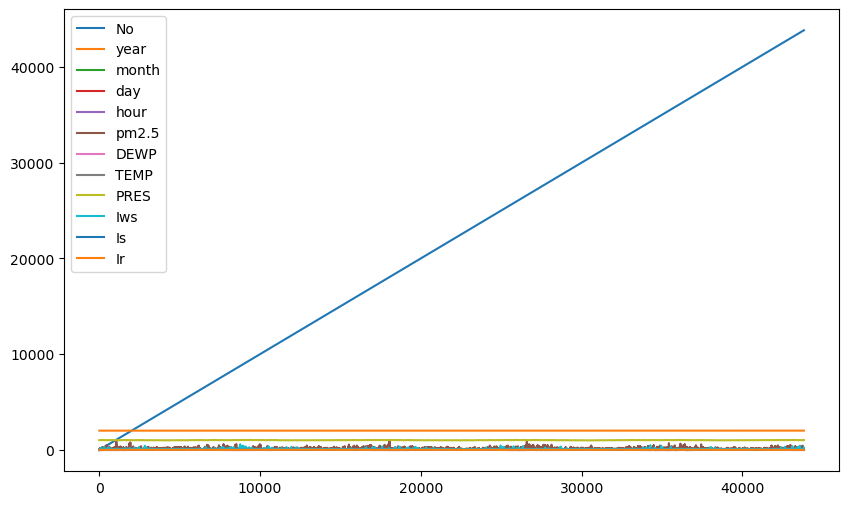

In [14]:
from scipy.signal import find_peaks

high_peaks, _ = find_peaks(df['pm2.5'], height=6000)
low_peaks, _ = find_peaks(-df['pm2.5'], height=-500)

df.plot(figsize=(10, 6))
plt.scatter(df.index[high_peaks], df.iloc[high_peaks], c='r')
plt.scatter(df.index[low_peaks], df.iloc[low_peaks], c='green')
plt.grid()
plt.show()